In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np
import seaborn as sns
import geopandas
import plotly.express as px

In [2]:
#Using pandas to read the csv file and encoding the file to ISO-88590-1
df = pd.read_csv('../input/forest-fires-in-brazil/amazon.csv', encoding = "ISO-8859-1")
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
#creating a dictionary with translations of months
month_map={'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March', 'Abril': 'April', 'Maio': 'May',
          'Junho': 'June', 'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September', 'Outubro': 'October',
          'Novembro': 'November', 'Dezembro': 'December'}
#mapping our translated months
df['month']=df['month'].map(month_map)
df.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


In [4]:
#Creating a pivot to get the total number of fires and the year
pivot1 = pd.pivot_table(df,values="number",index=["year"],aggfunc=np.sum)
pivot1.head()

,number
year,
1998,20013.971
1999,26882.821
2000,27351.251
2001,29071.612
2002,37390.600


Text(0.5, 1.0, 'Number of Fires by Year')

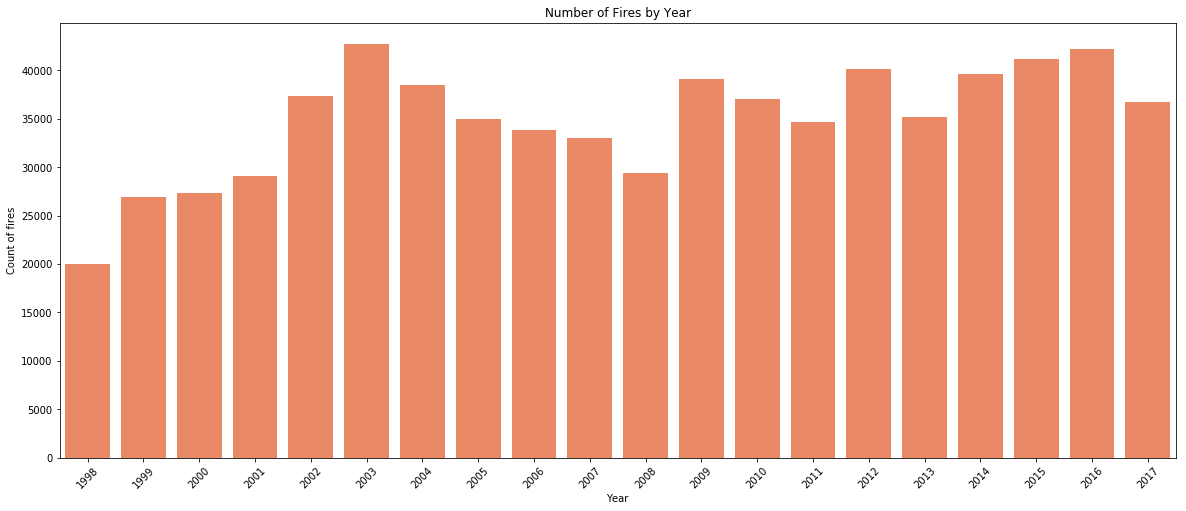

In [5]:
#Plotting the graph
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=pivot1.index, y="number", color="coral", data=pivot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Year")
plt.ylabel("Count of fires")
plt.title("Number of Fires by Year")